In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import numpy as np
import time

import train

In [2]:
tf.compat.v1.disable_eager_execution()

In [51]:
model_tf = tf.keras.models.Sequential()
model_tf.add(tf.keras.layers.Input(shape=(9,)))
model_tf.add(tf.keras.layers.Dense(18, activation='sigmoid'))
model_tf.add(tf.keras.layers.Dense(9, activation='linear'))
model_tf.compile(loss='mse', optimizer='adam', metrics=['mae'])
model_tf.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 18)                180       
_________________________________________________________________
dense_17 (Dense)             (None, 9)                 171       
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [52]:
num_games = 10000
start_time = time.time()
outcomes = train.q_learning(model_tf, num_games)
end_time = time.time()
total_time = end_time - start_time
print("total time:", total_time)

Game 1 of 10000.
Game 1001 of 10000.
Game 2001 of 10000.
Game 3001 of 10000.
Game 4001 of 10000.
Game 5001 of 10000.
Game 6001 of 10000.
Game 7001 of 10000.
Game 8001 of 10000.
Game 9001 of 10000.
total time: 196.55524230003357


In [53]:
outcomes = np.array(outcomes)

num_samples = min(1000, num_games)
interval = math.ceil(num_games / num_samples)
local_length = max(interval, min(int(num_games / 10), 100))

recent_percent_invalid = [np.vectorize(lambda x: int(x==-1))(outcomes[n:(n + local_length)]).sum() / local_length
                          for n in range(0, len(outcomes) - local_length, interval)]
recent_percent_loss = [np.vectorize(lambda x: int(x==0))(outcomes[n:(n + local_length)]).sum() / local_length
                          for n in range(0, len(outcomes) - local_length, interval)]
recent_percent_tie = [np.vectorize(lambda x: int(x==1))(outcomes[n:(n + local_length)]).sum() / local_length
                          for n in range(0, len(outcomes) - local_length, interval)]
recent_percent_win = [np.vectorize(lambda x: int(x==2))(outcomes[n:(n + local_length)]).sum() / local_length
                          for n in range(0, len(outcomes) - local_length, interval)]

(-0.01, 1.01)

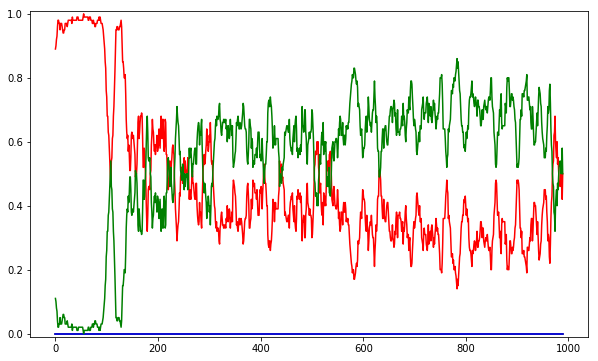

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
y_lenth = len(recent_percent_invalid)
ax.plot(list(range(y_lenth)), recent_percent_invalid, 'r')
ax.plot(list(range(y_lenth)), recent_percent_loss, 'k')
ax.plot(list(range(y_lenth)), recent_percent_tie, 'b')
ax.plot(list(range(y_lenth)), recent_percent_win, 'g')
ax.set_ylim(-0.01, 1.01)

In [ ]:
training_metadata = {'y': 0.95,
                     'eps': 0.5,
                     'decay_factor': 0.999,
                     'rewards': (0, 0.25, 0.5, 2),
                     'state_values': (1, 0, -1),
                     'opponent': 'random'
                     'outcomes': outcomes,
                    }

In [ ]:
model_directory = 'model_v1'
model.save(model_directory)

In [ ]:
m = tf.keras.models.load_model(model_directory)

In [ ]:
m.summary()